In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import shap

path2 = "./ankiety.csv"
pd.options.display.max_seq_items = 2000
MINAGE, MAXAGE = 18, 90

In [2]:
def read_data(path):
    df = pd.read_csv(path)
    fields = [
        "birth_date", "birth_place", "city_type", "education", "career", "left_handed", 
        "hair_color", "height", "weight", "smoking", "smoking_age", "ex_smoking_age", 
        "beer", "wine", "liquor", "pregnancy", "endometriosis", "symptoms_age", "diagnosis_age", 
        "operation_diagnosis", "operation_type", "endometriosis_type", "medicine", "family_endo", 
        "family_cancer", "family_cancer_dig", "other_illness", "birth_weight", "first_menstruation", 
        "night_shift", "cycle", "regular_cycle", "menstruation_lenght", "strong_bleeding", "clots", 
        "dark_blood", "spotting", "painful_ovulation", "menstruation_pain", "pain_level", 
        "chronic_pain_level", "pain_killers", "pills", "hormonal_birthcontrol", "cramps_during", 
        "cramps_apart", "stomach_ache_during", "stomach_ache_apart", "bloody_urine_during", 
        "bloody_urine_apart", "pelvis_pain_during", "pelvis_pain_apart", "vaginal_pain_during", 
        "vaginal_pain_apart", "sciatica", "sciatica_pain_during", "sciatica_pain_apart", 
        "leg_pain_during", "leg_pain_apart", "back_pain_during", "back_pain_apart", 
        "lowerback_pain_during", "lowerback_pain_apart", "toparm_pain_during", "toparm_pain_apart", 
        "urination_pain_during", "urination_pain_during_level", "urination_pain_apart", 
        "urinary_infection_symptoms", "abdominal_pressure_during", "abdominal_pressure_apart", 
        "stomach_cramps_during", "stomach_cramps_apart", "bowel_movement_during", 
        "bowel_movement_apart", "ibs_symptoms", "digestive_problems_during", "digestive_problems_apart", 
        "nausea_during", "nausea_apart", "vomit_during", "vomit_apart", "flatulence_during", 
        "flatulence_apart", "diarrhea_during", "diarrhea_apart", "constipation_during", 
        "constipation_apart", "defecation_pain_during", "defecation_pain_apart", "defecation_blood_during", 
        "defecation_blood_apart", "sex_pain", "sex_pain_level", "sex_cramps", "sex_bleeding", 
        "pulmonary_issues", "head_aches", "migraine", "dizziness", "fainting", "infertility", 
        "mood_swings", "tiredness", "anemia", "doctors_appointments", "other_symptoms"
    ]
    
    old_columns = ['Data urodzenia (format: rok-miesiąc-dzień np. 1999-11-24): ',
    'Miejsce urodzenia:',
    'Miejsce zamieszkania:',
    'Wykształcenie: ',
    'Jaki zawód Pani wykonuje? ',
    'Czy jest Pani leworęczna? ',
    'Jaki jest Pani naturalny kolor włosów? ',
    'Wzrost w cm:',
    'Waga w kg:',
    'Czy pali Pani papierosy, jeżeli tak to proszę wpisać ile dziennie? ',
    'W jakim wieku rozpoczęła Pani palenie papierosów? ',
    'W jakim wieku zakończyła Pani palenie papierosów (dotyczy byłych palaczy)? ',
    'Jakie ilości alkoholu spożywa Pani tygodniowo?  [Butelka lub puszka piwa (szt./tydzień)]',
    'Jakie ilości alkoholu spożywa Pani tygodniowo?  [Lampka wina (szt./tydzień)]',
    'Jakie ilości alkoholu spożywa Pani tygodniowo?  [Mały kieliszek mocnego alkoholu np. wódka, whiski, rum (szt./tydzień)]',
    'Jeżeli była Pani w ciąży lub w ciążach, proszę podać liczbę urodzonych dzieci:',
    'Czy ma Pani zdiagnozowaną endometriozę?',
    'Ile miała Pani lat, gdy pojawiły się pierwsze objawy mogące wskazywać na endometriozę?',
    'Ile miała Pani lat kiedy postawiono ostateczną diagnozę Endometriozy?',
    'Czy diagnoza Endometriozy została potwierdzona operacyjnie?',
    'Jeśli w poprzednim pytaniu zaznaczyła Pani tak, proszę napisać jaki rodzaj operacji Pani przeszła: ',
    'Jaki typ Endometriozy został u Pani zdiagnozowany?  Czy ma Pani adenomiozę?Możliwe jest wybranie kilku odpowiedzi:',
    'Czy przed operacją stosowała Pani antykoncepcję hormonalną lub/i leki na Endometriozę (np. Visanne, Endovelle, Diemono)?: ',
    'Czy w Pani najbliższej rodzinie (pokrewieństwo krwi) wystąpiła Endometrioza? ',
    'Czy w Pani rodzinie wystąpiły bądź występują  nowotwory ginekologiczne: np. jajnika, piersi lub endometrium (z wyłączeniem raka szyjki macicy)? ',
    'Czy w Pani rodzinie wystąpiły lub występują nowotwory przewodu pokarmowego? ',
    'Czy ma Pani zdiagnozowane chorobę lub choroby współistniejące? Jeżeli tak, proszę zaznaczyć/wpisać jaka jest to choroba. Możliwy jest wielokrotny wybór. ',
    'Ile gramów wynosiła Pani waga przy urodzeniu?',
    'W jakim wieku wystąpiła u Pani pierwsza miesiączka? ',
    'Czy pracowała Pani na nocne zmiany? ',
    'Proszę podać jaka była średnia długość Pani cyklu menstruacyjnego (w dniach): ',
    'Czy występowały u Pani nieregularne miesiączki (różnica ponad 3 dni pomiędzy kolejnymi cyklami) lub brak miesiączki? ',
    'Ile dni trwało zazwyczaj Pani krwawienie menstruacyjne? ',
    'Czy występowało u Pani bardzo obfite krwawienie podczas miesiączki?',
    'Czy obserwowała Pani dużą liczbę skrzepów we krwi menstruacyjnej?',
    'Czy występowała u Pani ciemna (czarna lub brązowa) krew bezpośrednio przed miesiączką?',
    'Czy występowały u Pani plamienia lub/i krwawienia pomiędzy miesiączkami (niezwiązane z przyjmowaniem hormonów)? ',
    'Czy występowały u Pani bolesne owulacje?',
    'Jeśli występowały u Pani bolesne miesiączki, proszę o zaznaczenie natężenia bólu podczas miesiączki w skali VAS: ',
    'Jeśli występowały u Pani bolesne miesiączki, proszę o zaznaczenie stopnia ograniczenia wykonywania codziennych czynności: ',
    'Czy odczuwała Pani przewlekły ból? proszę o zaznaczenie natężenia bólu w skali VAS: ',
    'Czy przyjmowała Pani niehormonalne leki przeciwbólowe? Jeżeli tak, to proszę wpisać jaki rodzaj leku Pani przyjmowała? Jeżeli nie, proszę wpisać "Nie dotyczy"',
    'Ile w przybliżeniu tabletek leków przeciwbólowych  przyjmowała Pani w przeciągu tygodnia: ',
    'Czy stosowała Pani antykoncepcję hormonalną?',
    'Czy występowały u Pani skurcze brzucha bezpośrednio przed lub w trakcie miesiączki?',
    'Czy występowały u Pani skurcze brzucha poza miesiączką (niezwiązane z miesiączką)?',
    'Czy występowały u Pani bóle brzucha bezpośrednio przed lub w trakcie miesiączki? ',
    'Czy występowały u Pani bóle brzucha poza miesiączką (niezwiązane z miesiączką)? ',
    'Czy występowała u Pani krew w moczu  bezpośrednio przed lub w trakcie miesiączki? ',
    'Czy występowała u Pani krew w moczu poza miesiączką?',
    'Czy odczuwała Pani ból w obrębie miednicy bezpośrednio przed lub podczas miesiączki?',
    'Czy odczuwała Pani ból w obrębie miednicy poza miesiączką (niezwiązany z miesiączką)?',
    'Czy  występował u Pani ból pochwy bezpośrednio przed lub podczas miesiączki?',
    'Czy występował u Pani ból pochwy poza miesiączką (niezwiązany z miesiączką)?',
    'Czy zdiagnozowano u Pani rwę kulszową?',
    'Czy występował u Pani ból przypominający rwę kulszową bezpośrednio przed lub podczas miesiączki? ',
    'Czy występował u Pani ból przypominający rwę kulszową poza miesiączka (niezwiązany z miesiączką)? ',
    'Czy występował u Pani ból nogi bezpośrednio przed lub podczas miesiączki? ',
    'Czy występował u Pani ból nogi poza miesiączką (niezwiązany z miesiączką)? ',
    'Czy występował u Pani ból pleców bezpośrednio przed lub podczas miesiączki?',
    'Czy występował u Pani ból pleców poza miesiączką (niezwiązany z miesiączką)?',
    'Czy występował u Pani ból w dolnej części pleców bezpośrednio przed lub podczas miesiączki?',
    'Czy występował u Pani ból w dolnej części pleców poza miesiączką (niezwiązany z miesiączką)?',
    'Czy odczuwała Pani ból zlokalizowany na szczycie ramienia bezpośrednio przed lub podczas miesiączki? ',
    'Czy odczuwała Pani ból zlokalizowany na szczycie ramienia poza miesiączką (niezwiązany z miesiączką)? ',
    'Czy występował u Pani ból przy oddawaniu moczu bezpośrednio przed lub podczas miesiączki? ',
    'Proszę o zaznaczenie natężenia bólu przy oddawaniu moczu bezpośrednio przed lub podczas miesiączki w skali VAS: ',
    'Czy występował u Pani ból przy oddawaniu moczu poza miesiączką (niezwiązany z miesiączką)? ',
    'Czy występowały u Pani nawracające objawy przypominające infekcje, zapalenia układu moczowego (uczucie parcia na mocz)? ',
    'Czy występował u Pani ból lub ucisk w jamie brzusznej bezpośrednio przed lub w trakcie miesiączki?',
    'Czy występował u Pani ból lub ucisk w jamie brzusznej poza miesiączką (niezwiązany z miesiączką)?',
    'Czy występowały u Pani skurcze żołądka bezpośrednio przed lub podczas miesiączki?',
    'Czy występowały u Pani skurcze żołądka poza miesiączką (niezwiązane z miesiączką)?',
    'Czy odczuwała Pani bolesne ruchy jelit bezpośrednio przed lub podczas miesiączki?',
    'Czy odczuwała Pani bolesne ruchy jelit poza miesiączką (niezwiązane z miesiączką)?',
    'Czy występowały u Pani objawy typowe dla zespołu jelita drażliwego (zaburzenia pracy jelit, bóle brzucha oraz towarzyszące im wzdęcia, biegunki lub zaparcia)?',
    'Czy występowały u Pani problemy z trawieniem bezpośrednio przed lub podczas miesiączki?',
    'Czy występowały u Pani problemy z trawieniem poza miesiączką (niezwiązane z miesiączką)?',
    'Czy występowały u Pani mdłości bezpośrednio przed lub podczas miesiączki?:',
    'Czy występowały u Pani mdłości poza miesiączką (niezwiązane z miesiączką)?',
    'Czy występowały u Pani wymioty bezpośrednio przed lub podczas miesiączki?',
    'Czy występowały u Pani wymioty poza miesiączką (niezwiązane z miesiączką)?',
    'Czy występowały u Pani wzdęcia bezpośrednio przed lub podczas miesiączki? ',
    'Czy występowały u Pani wzdęcia poza miesiączką (niezwiązane z miesiączką)?',
    'Czy występowała u Pani biegunka bezpośrednio przed lub podczas miesiączki? ',
    'Czy występowała u Pani biegunka poza miesiączką (niezwiązana z miesiączką)?',
    'Czy występowały u Pani przewlekłe zaparcia bezpośrednio przed lub podczas miesiączki?',
    'Czy występowały u Pani przewlekłe zaparcia poza miesiączka (niezwiązane z miesiączką)?',
    'Czy odczuwała Pani ból podczas oddawania stolca bezpośrednio przed lub podczas miesiączki? ',
    'Czy odczuwała Pani ból podczas oddawania stolca poza miesiączką (niezwiązany z miesiączką)?',
    'Czy występowało u Pani krwawienie z odbytu podczas lub po oddaniu stolca bezpośrednio przed lub podczas miesiączki? ',
    'Czy występowało u Pani krwawienie z odbytu podczas lub po oddaniu stolca poza miesiączką (niezwiązane z miesiączką)? ',
    'Czy odczuwała Pani ból głęboki podczas lub po stosunkach seksualnych? ',
    'Jeśli zaznaczyła Pani w poprzednim pytaniu odpowiedź TAK, proszę o zaznaczenie natężenia bólu w skali VAS: ',
    'Czy odczuwała Pani skurcze brzucha podczas stosunków seksualnych?',
    'Czy występowało o Pani krwawienie podczas lub po stosunkach seksualnych?',
    'Czy występował u Pani cykliczny, nawracający kaszel lub krwioplucie lub ból w klatce piersiowej?',
    'Czy występowały u Pani bóle głowy?',
    'Czy występowały u Pani migreny?',
    'Czy występowały u Pani zawroty głowy?',
    'Czy występowały u Pani omdlenia, utraty przytomności?',
    'Czy zdiagnozowano u Pani niepłodność?',
    'Czy odczuwała Pani wahania nastrojów?',
    'Czy występowało u Pani przewlekłe zmęczenie?',
    'Proszę wpisać poniżej ile razy w ciągu roku występowała u Pani anemia spowodowana niedoborem żelaza:',
    'Proszę zaznaczyć liczbę wizyt, konsultacji lekarskich w ciągu roku:',
    'Jeżeli miała Pani inne objawy związane z endometriozą niż wymienione w ankiecie, proszę je krótko opisać poniżej. Proszę w nawiasie napisać kiedy wystąpiły: (bezpośrednio przed lub w trakcie miesiączki) lub (poza miesiączką) ']
    fields_to_old_columns = dict(zip(old_columns, fields))
    df.rename(columns=fields_to_old_columns, inplace=True)
    return df
df=read_data(path2)
df.head()
print(len(df.columns))
column_names = df.columns.tolist()
print(column_names)

108
['W którym roku została wypełniona ankieta przez pacjentkę ', 'birth_date', 'birth_place', 'city_type', 'education', 'career', 'left_handed', 'hair_color', 'height', 'weight', 'smoking', 'smoking_age', 'ex_smoking_age', 'beer', 'wine', 'liquor', 'pregnancy', 'endometriosis', 'symptoms_age', 'diagnosis_age', 'operation_diagnosis', 'operation_type', 'endometriosis_type', 'medicine', 'family_endo', 'family_cancer', 'family_cancer_dig', 'other_illness', 'birth_weight', 'first_menstruation', 'night_shift', 'cycle', 'regular_cycle', 'menstruation_lenght', 'strong_bleeding', 'clots', 'dark_blood', 'spotting', 'painful_ovulation', 'menstruation_pain', 'pain_level', 'chronic_pain_level', 'pain_killers', 'pills', 'hormonal_birthcontrol', 'cramps_during', 'cramps_apart', 'stomach_ache_during', 'stomach_ache_apart', 'bloody_urine_during', 'bloody_urine_apart', 'pelvis_pain_during', 'pelvis_pain_apart', 'vaginal_pain_during', 'vaginal_pain_apart', 'sciatica', 'sciatica_pain_during', 'sciatica_p

In [3]:
def filter_columns(df):
    columns_to_keep = [
        'id','left_handed','birth_place',"education", "career", "left_handed", 
        "hair_color", 'birth_date', 'city_type', 'height', 'weight', 'smoking','ex_smoking_age','smoking_age', 'beer', 
        'wine', 'liquor', "pregnancy", 'endometriosis', 'family_endo', 'family_cancer', 
        'family_cancer_dig', 'other_illness', "birth_weight", 'first_menstruation', 'night_shift', 'cycle', 
        'regular_cycle', 'menstruation_lenght', 'strong_bleeding', 'clots', 'dark_blood', 'spotting', 
        'painful_ovulation', 'menstruation_pain', 'pain_level', 'chronic_pain_level', 'pain_killers', 'pills', 
        'hormonal_birthcontrol', 'cramps_during', 'cramps_apart', 'stomach_ache_during', 'stomach_ache_apart', 
        'bloody_urine_during', 'bloody_urine_apart', 'pelvis_pain_during', 'pelvis_pain_apart', 'vaginal_pain_during', 
        'vaginal_pain_apart', 'sciatica', 'sciatica_pain_during', 'sciatica_pain_apart', 'leg_pain_during', 
        'leg_pain_apart', 'back_pain_during', 'back_pain_apart', 'lowerback_pain_during', 'lowerback_pain_apart', 
        'toparm_pain_during', 'toparm_pain_apart', 'urination_pain_during', 'urination_pain_during_level', 
        'urination_pain_apart', 'urinary_infection_symptoms', 'abdominal_pressure_during', 'abdominal_pressure_apart', 
        'stomach_cramps_during', 'stomach_cramps_apart', 'bowel_movement_during', 'bowel_movement_apart', 
        'ibs_symptoms', 'digestive_problems_during', 'digestive_problems_apart', 'nausea_during', 'nausea_apart', 
        'vomit_during', 'vomit_apart', 'flatulence_during', 'flatulence_apart', 'diarrhea_during', 'diarrhea_apart', 
        'constipation_during', 'constipation_apart', 'defecation_pain_during', 'defecation_pain_apart', 
        'defecation_blood_during', 'defecation_blood_apart', 'sex_pain', 'sex_pain_level', 'sex_cramps', 'sex_bleeding', 
        'pulmonary_issues', 'head_aches', 'migraine', 'dizziness', 'fainting', 'infertility', 'mood_swings', 
        'tiredness', 'anemia'
    ]
    filtered_df = df.loc[:, df.columns.intersection(columns_to_keep)]
    
    return filtered_df
df = filter_columns(df)
not_to_consider = [ 'city_type', 'education', 'career', 'left_handed', 'hair_color', 'birth_place', 'birth_date', 'smoking', 'ex_smoking_age', 'smoking_age', 'endometriosis']
column_names = df.columns.tolist()
print(column_names)

['birth_date', 'birth_place', 'city_type', 'education', 'career', 'left_handed', 'hair_color', 'height', 'weight', 'smoking', 'smoking_age', 'ex_smoking_age', 'beer', 'wine', 'liquor', 'pregnancy', 'endometriosis', 'family_endo', 'family_cancer', 'family_cancer_dig', 'other_illness', 'birth_weight', 'first_menstruation', 'night_shift', 'cycle', 'regular_cycle', 'menstruation_lenght', 'strong_bleeding', 'clots', 'dark_blood', 'spotting', 'painful_ovulation', 'menstruation_pain', 'pain_level', 'chronic_pain_level', 'pain_killers', 'pills', 'hormonal_birthcontrol', 'cramps_during', 'cramps_apart', 'stomach_ache_during', 'stomach_ache_apart', 'bloody_urine_during', 'bloody_urine_apart', 'pelvis_pain_during', 'pelvis_pain_apart', 'vaginal_pain_during', 'vaginal_pain_apart', 'sciatica', 'sciatica_pain_during', 'sciatica_pain_apart', 'leg_pain_during', 'leg_pain_apart', 'back_pain_during', 'back_pain_apart', 'lowerback_pain_during', 'lowerback_pain_apart', 'toparm_pain_during', 'toparm_pain_a

In [4]:
len(df[df['birth_place'].str.lower().isin(['', 'ukraina', 'ukraine'])])

0

In [5]:
def drop_abroad(df):
    df = df[~df['birth_place'].str.lower().isin(['', 'ukraina', 'ukraine'])]
    df.reset_index(drop=True, inplace=True)
    df.head()
    return df
df = drop_abroad(df)
not_to_consider.append('birth_place')

In [6]:
def convert_birth_date_to_age(df):
    def calculate_age(birth_date):
        try:
            birth_date = pd.to_datetime(birth_date, errors='coerce')
            if pd.isnull(birth_date):
                return np.nan
            today = datetime.today()
            age = today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))
            return age
        except:
            return np.nan
    df['age'] = df['birth_date'].apply(calculate_age)
    
    return df
df = convert_birth_date_to_age(df)
not_to_consider.append('birth_date')


In [7]:
def extract_first_number(s):
    if isinstance(s, str):
        match = re.search(r'\d+', s)
        return int(match.group()) if match else np.nan
    elif isinstance(s, (int, float)):
        return s
    return np.nan

# Function to determine smoking time
def still_smoking(smoking, ex_smoking_age, smoking_age, age):
    if isinstance(smoking, str) and smoking.lower() != 'nie dotyczy':
        if isinstance(ex_smoking_age, str) and ex_smoking_age.lower() == 'nie dotyczy':
            if isinstance(smoking_age, str) and smoking_age.lower() != 'nie dotyczy':
                return age - extract_first_number(smoking_age)
            else:
                return np.nan
        else:
            if isinstance(smoking_age, str) and smoking_age.lower() != 'nie dotyczy':
                return extract_first_number(smoking_age) - extract_first_number(ex_smoking_age)
            else:
                return np.nan
    elif isinstance(smoking, (int, float)) or (isinstance(smoking, str) and smoking.isdigit()):
        return 0
    else:
        return 0

def smoking_process(df):
    df['smoking_time'] = df.apply(lambda row: still_smoking(row['smoking'], row['ex_smoking_age'], row['smoking_age'], row['age']), axis=1)
    return df

df = smoking_process(df)

not_to_consider.extend(['smoking', 'ex_smoking_age', 'smoking_age'])

In [8]:
def normalize_categorical(df,column,allowed_categories):
    df[column] = df[column].str.lower().str.strip()
    df[column] = df[column].apply(lambda x: x if x in allowed_categories else np.nan)   
    return df

def normilize_all_categorical(df):
    info = [
        [ 'city_type' , ["miasto duże (powyżej 100 tys. mieszkańców)", "miasto średnie (od 20 do 100 tys. mieszkańców)", "miasto małe (do 20 tys. mieszkańców)", "wieś"]],
        [ 'left_handed', ['tak' , 'nie']],
        ['endometriosis', ['tak' , 'nie']],
        ['night_shift',['tak' , 'nie']],
        ['regular_cycle',['tak' , 'nie']],
        ['strong_bleeding',['tak' , 'nie']],
        ['clots',['tak' , 'nie']],
        ['dark_blood',['tak' , 'nie']],
        ['spotting',['tak' , 'nie']],
        ['painful_ovulation',['tak' , 'nie']],
        ['pain_level',['nie dotyczy' , 'ból nie wpływa na wykonywanie codziennych czynności' , 'ból częściowo ogranicza wykonywanie codziennych czynności' , 'ból utrudnia wykonywanie codziennych czynności', 'Ból uniemożliwia wykonywanie codziennych czynności' ]],
        ['pills',['0','1-2','3-4','5-6','7 i więcej']],
        ['hormonal_birthcontrol', ['tak', 'nie']],
        ['cramps_during', ['tak', 'nie']],
        ['cramps_apart', ['tak', 'nie']],
        ['stomach_ache_during', ['tak', 'nie']],
        ['stomach_ache_apart', ['tak', 'nie']],
        ['bloody_urine_during', ['tak', 'nie']],
        ['bloody_urine_apart', ['tak', 'nie']],
        ['pelvis_pain_during', ['tak', 'nie']],
        ['pelvis_pain_apart', ['tak', 'nie']],
        ['vaginal_pain_during', ['tak', 'nie']],
        ['vaginal_pain_apart', ['tak', 'nie']],
        ['sciatica', ['tak', 'nie']],
        ['sciatica_pain_during', ['tak', 'nie']],
        ['sciatica_pain_apart', ['tak', 'nie']],
        ['leg_pain_during', ['tak', 'nie']],
        ['leg_pain_apart', ['tak', 'nie']],
        ['back_pain_during', ['tak', 'nie']],
        ['back_pain_apart', ['tak', 'nie']],
        ['lowerback_pain_during', ['tak', 'nie']],
        ['lowerback_pain_apart', ['tak', 'nie']],
        ['toparm_pain_during', ['tak', 'nie']],
        ['toparm_pain_apart', ['tak', 'nie']],
        ['urination_pain_during', ['tak', 'nie']],
        ['urination_pain_apart', ['tak', 'nie']],
        ['urinary_infection_symptoms', ['tak', 'nie']],
        ['abdominal_pressure_during', ['tak', 'nie']],
        ['abdominal_pressure_apart', ['tak', 'nie']],
        ['stomach_cramps_during', ['tak', 'nie']],
        ['stomach_cramps_apart', ['tak', 'nie']],
        ['bowel_movement_during', ['tak', 'nie']],
        ['bowel_movement_apart', ['tak', 'nie']],
        ['ibs_symptoms', ['tak', 'nie']],
        ['digestive_problems_during', ['tak', 'nie']],
        ['digestive_problems_apart', ['tak', 'nie']],
        ['nausea_during', ['tak', 'nie']],
        ['nausea_apart', ['tak', 'nie']],
        ['vomit_during', ['tak', 'nie']],
        ['vomit_apart', ['tak', 'nie']],
        ['flatulence_during', ['tak', 'nie']],
        ['flatulence_apart', ['tak', 'nie']],
        ['diarrhea_during', ['tak', 'nie']],
        ['diarrhea_apart', ['tak', 'nie']],
        ['constipation_during', ['tak', 'nie']],
        ['constipation_apart', ['tak', 'nie']],
        ['defecation_pain_during', ['tak', 'nie']],
        ['defecation_pain_apart', ['tak', 'nie']],
        ['defecation_blood_during', ['tak', 'nie']],
        ['defecation_blood_apart', ['tak', 'nie']],
        ['pulmonary_issues', ['tak', 'nie']],
        ['head_aches', ['tak', 'nie']],
        ['migraine', ['tak', 'nie']],
        ['dizziness', ['tak', 'nie']],
        ['fainting', ['tak', 'nie']],
        ['mood_swings', ['tak', 'nie']],
        ['tiredness', ['tak', 'nie']],
        ['sex_pain', ['tak', 'nie' , 'nie dotyczy']],
        ['sex_bleeding', ['tak', 'nie' , 'nie dotyczy']],
        ['sex_cramps', ['tak', 'nie' , 'nie dotyczy']],
        ['infertility', ['tak', 'nie' , 'nie dotyczy']]]
    for feature in info:
        column , categories = feature
        df = normalize_categorical(df,column,categories)
    return df

df = normilize_all_categorical(df)

In [9]:
numerical_columns = ['height', 'weight', 'first_menstruation', 'cycle', 'menstruation_lenght', 'menstruation_pain', 'chronic_pain_level', 'urination_pain_during_level', 'sex_pain_level']

def numerical_missing_values(df, columns):
    for col in columns:
        df[col] = df[col].astype(str)
        df[col] = df[col].str.extract(r'(\d+)')
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col] = df[col].fillna(df[col].mean())
        df[col] = df[col].astype(int)
    return df

df = numerical_missing_values(df, numerical_columns)



In [10]:
# for columns with alcohol -> assume empty is 0
##df[alc] = df[alc].fillna(0)   

In [11]:
def process_pain(df):
    columns = ['menstruation_pain', 'chronic_pain_level', 'urination_pain__during_level', 'sex_pain_level']

    for feature in columns:
        if feature in df.columns:
            df[feature] = pd.to_numeric(df[feature], errors='coerce')
            df[feature] = df[feature].where(df[feature].between(0, 10), np.nan)
    return df

# Assuming df is your DataFrame
df = process_pain(df)

In [12]:
def proccess_drinking(df):
    columns = ['beer','wine','liqour']
    def categorize(value):
        value = str(value)
        if value in ['0.0']:
            return '0'
        elif value in ['1.0','2.0','3.0']:
            return '1-3'
        elif value in ['4.0','5.0','6.0']:
            return '4-6'
        elif value in ['7.0','8.0','9.0','10.0']:
            return '7-10'
        elif value in ['11 i więcej']:
            return '1-3'
        else:
            return np.nan
    for feature in columns:
        df[feature] = df[feature].apply(categorize) 
    return df


In [13]:
def process_relationships(df,x):
    options = [
        'matka',
        'ciocia (siostra matki lub ojca)',
        'babcia',
        'córka',
        'kuzynka (córka rodzeństwa matki lub ojca)',
        'siostra',
        'nie dotyczy',
        'inna odpowiedź'
    ]
    for option in options:
        df[option] = 0

    for index, row in df.iterrows():
        value = row[x]
        if isinstance(value, str):
            relationships = value.lower().split(';')
            for relationship in relationships:
                relationship = relationship.strip()
                if relationship in options:
                    df.at[index, relationship] = 1
                else:
                    df.at[index, relationship] = np.nan 
        else:
            df.at[index, relationship] = np.nan
    df = df.drop(x, axis=1)

    return df


In [14]:
def process_numerical(df):
    columns = ['height','weight','menstruation_lenght', 'first_menstruation']
    for column in columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')
    return df
df = process_numerical(df)

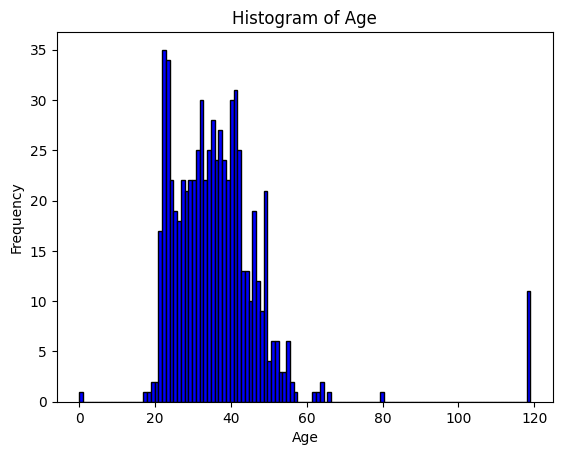

There are 4 NAs in age column


In [15]:
plt.hist(df['age'], bins=120, color='blue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
print("There are", pd.isna(df.age).sum(), "NAs in age column")

684


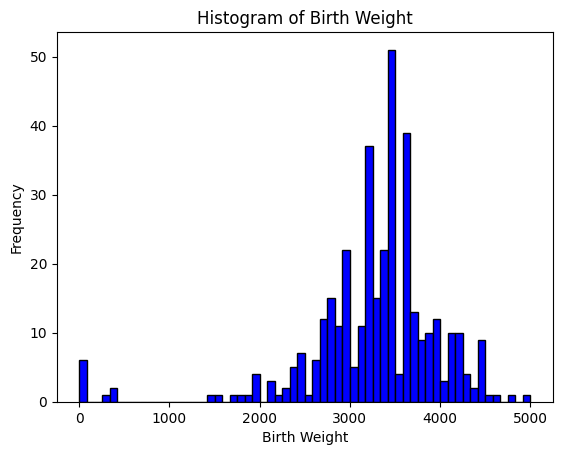

There are 310 NAs in birth weight column
There are 1 values above 5000


In [16]:
import re
import numpy as np

# age filter
def age_filter(df):
    return df[(df['age'] >= MINAGE) & (df['age'] < MAXAGE)]

def clean_weight(value):
    value = str(value)
    if not any(char.isdigit() for char in value):
        return np.nan
    # removing everything before number
    value = re.sub(r'^[^\d]*', '', value)
    value = value.replace(" ", "")
    value = value.replace(",", ".")
    if '-' in value:
        low, high = value.split('-')
        if 'kg' in low:
            low = float(low.replace("kg", "")) * 1000
        elif 'g' in low:
            low = float(low.replace("g", ""))
        else:
            low = float(low)
        if 'kg' in high:
            high = float(high.replace("kg", "")) * 1000
        elif 'g' in high:
            high = float(high.replace("g", ""))
        else:
            high = float(high)
        return (low + high) / 2
    elif 'kg' in value:
        value = float(value.replace("kg", "")) * 1000
    elif 'gr.' in value:
        value = float(value.replace("gr.", ""))
    elif 'g' in value:
        value = float(value.replace('g', ''))
    else:
        value = float(value)
    return value

# weight filter
def birth_weigth_filter(df):
    return df[(df['birth_weight'] >= 800) & (df['birth_weight'] <= 7000) | (df['birth_weight'].isna())]

df = age_filter(df)
print(len(df))
df['birth_weight'] = df['birth_weight'].apply(clean_weight)
plt.hist(df['birth_weight'][df.birth_weight<30000], bins=60, color='blue', edgecolor='black')
plt.title('Histogram of Birth Weight')
plt.xlabel('Birth Weight')
plt.ylabel('Frequency')
plt.show()
print("There are", pd.isna(df.birth_weight).sum(), "NAs in birth weight column")
print("There are", len(df[df['birth_weight'] > 7000]), "values above 5000")
df = birth_weigth_filter(df)


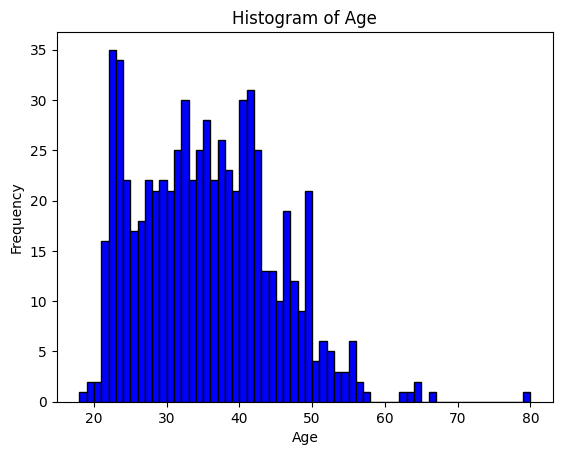

674


In [17]:
plt.hist(df['age'], bins=62, color='blue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
print(len(df))

In [18]:
# transform endometriosis & cancer in family into binary
def illness_into_binary(value):
    return 'nie' if str(value).split()[0].lower() == 'nie' else 'tak'

df['family_endo'] = df['family_endo'].apply(illness_into_binary)
df['family_cancer'] = df['family_cancer'].apply(illness_into_binary)
df['family_cancer_dig'] = df['family_cancer_dig'].apply(illness_into_binary)

In [19]:
# alcohol in a week
# we assume:
# one beer - 500 ml : 5%
# one wine - 175 ml (standard glass of wine) : 12%
# one shot of strong alcohol - 25 ml : 40%
# equation: units of alcohol = [strength(Alcohol By Volume) * drink volume(ml)] / 1000

def units_of_alcohol(df):
    return ((df['beer'] * 500 * 5) + (df['wine'] * 175 * 12) + (df['liquor'] * 40 * 25))/1000

df['alcohol_units'] = units_of_alcohol(df)
df = df.drop(columns=['beer', 'wine', 'liquor'])

In [20]:
def clean_pregnancy(value):
    value = str(value)
    if any(char.isdigit() for char in value):
        value = re.sub(r'[^\d]*', '', value)
    else:
        value = 'nie dotyczy'
    return value

df['pregnancy'] = df['pregnancy'].apply(clean_pregnancy)

In [21]:
def process_pills(df):
    def categorize_pills(value):
        if pd.isna(value):
            return np.nan
        value = str(value).strip()
        if value == '0':
            return 'Nie'
        elif value in ['1-2', '3-4', '5-6', '7 i więcej']:
            return 'Tak'
        else:
            return np.nan

    df['pills'] = df['pills'].apply(categorize_pills)
    return df

df = process_pills(df)

In [22]:
# sex_pain, sex_pain_level, sex_cramps
condition = (df['pregnancy'] != 'nie dotyczy') & (df['sex_cramps'] == 'nie dotyczy')

# Apply the condition to filter the DataFrame and print the selected columns
print(df.loc[condition, ['pregnancy', 'sex_pain']])

Empty DataFrame
Columns: [pregnancy, sex_pain]
Index: []


In [23]:
print(len(df))

674


In [24]:
def drop_columns_with_missing_data(df, threshold=0.5):
    missing_data_ratio = df.isnull().mean()
    columns_to_drop = missing_data_ratio[missing_data_ratio > threshold]
    if not columns_to_drop.empty:
        print("Dropping columns with too much missing data:")
        for col, ratio in columns_to_drop.items():
            print(f" - {col}: {ratio:.2%} missing")
    else:
        print("No columns to drop based on the specified threshold.")
    columns_to_keep = missing_data_ratio[missing_data_ratio <= threshold].index
    return df[columns_to_keep]


def drop_rows_with_missing_data(df, threshold=0.5):
    return df.dropna(thresh=df.shape[1]*threshold)

df = drop_columns_with_missing_data(df, threshold=0.5)
df = drop_rows_with_missing_data(df, threshold=0.5)

No columns to drop based on the specified threshold.


In [25]:
print(len(df))

667


In [26]:
not_to_consider.append('endometriosis')
not_to_consider.append('other_illness')
not_to_consider.append('anemia')
not_to_consider.append('pain_killers')
X = df.drop(not_to_consider, axis=1)
y = df['endometriosis']
y = y.map({'tak': 1, 'nie': 0})
categorical_cols = X.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le
print("Categorical encoding complete.")

Categorical encoding complete.


### Features distribution

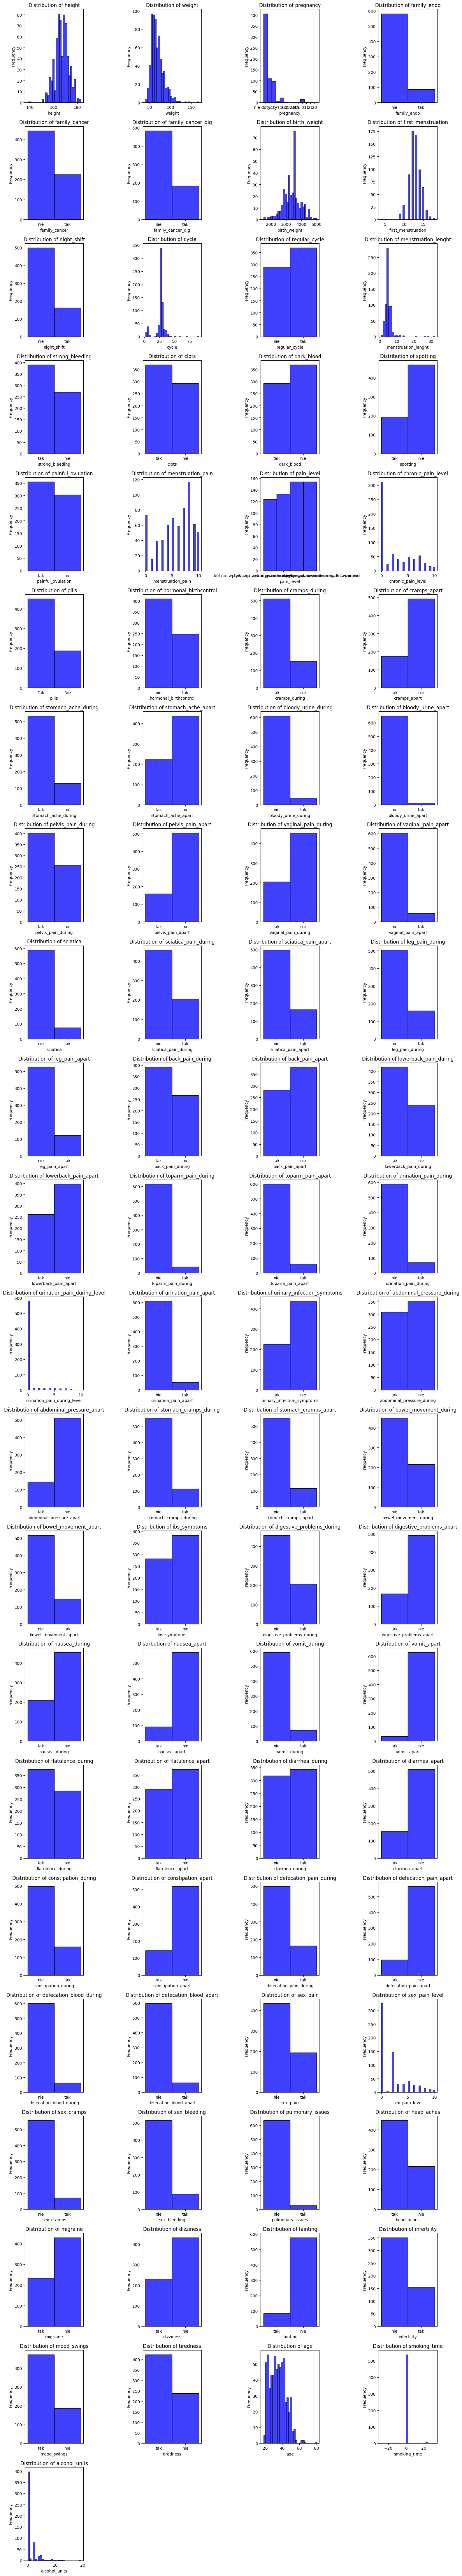

In [27]:
num_features = len(df.columns) - 1
num_cols = 4
num_rows = -(-num_features // num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()

for i, column in enumerate(X.columns):
    sns.histplot(df[column], bins=30, color='blue', edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}', fontsize=12)
    axes[i].set_xlabel(column, fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

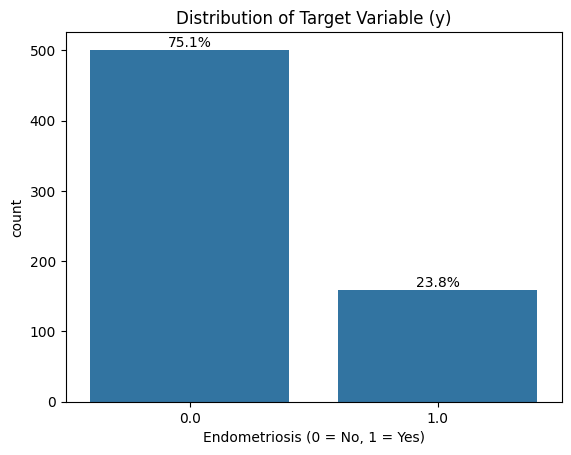

Number of NA in target variable: 7


In [28]:
x = sns.countplot(x=y)
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Endometriosis (0 = No, 1 = Yes)')
total = len(y)
for p in x.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y_pos = p.get_height()
    plt.text(x, y_pos, percentage, ha='center', va='bottom')
plt.show()
print("Number of NA in target variable:", y.isna().sum())

In [29]:
# clean the data

categorical_cols = X.select_dtypes(include="object").columns
X[categorical_cols] = X[categorical_cols].fillna("missing")
numerical_cols = X.select_dtypes(exclude="object").columns

# Save into a csv before imputation
y2 = y.copy()
X2 = X.copy()
X2 = X2[~y2.isna()]
y2 = y2.dropna()
df_not_imputed = pd.concat([X2, y2.rename('target')], axis=1)
df_not_imputed.to_csv("endometriosis_with_na.csv", index=False)

imputer = SimpleImputer(strategy="mean")
X[numerical_cols] = imputer.fit_transform(X[numerical_cols])
X = X[~y.isna()]
y = y.dropna()

In [30]:
print(len(X))

660


In [31]:
df_2 = pd.concat([X, y.rename('target')], axis=1)
df_2.to_csv("endometriosis.csv", index=False)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}\n")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
labels = ['No Endometriosis', 'Endometriosis']
print("Confusion Matrix:")
print(f"{'':<20}{labels[0]:<20}{labels[1]:<20}")
print(f"{labels[0]:<20}{cm[0, 0]:<20}{cm[0, 1]:<20}  # True Negative (TN), False Positive (FP)")
print(f"{labels[1]:<20}{cm[1, 0]:<20}{cm[1, 1]:<20}  # False Negative (FN), True Positive (TP)")

Accuracy: 0.79

              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87       150
         1.0       0.61      0.42      0.49        48

    accuracy                           0.79       198
   macro avg       0.72      0.67      0.68       198
weighted avg       0.78      0.79      0.78       198

Confusion Matrix:
                    No Endometriosis    Endometriosis       
No Endometriosis    137                 13                    # True Negative (TN), False Positive (FP)
Endometriosis       28                  20                    # False Negative (FN), True Positive (TP)


In [33]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}\n")
print("Classification Report - Test:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
labels = ['No Endometriosis', 'Endometriosis']
print("Confusion Matrix:")
print(f"{'':<20}{labels[0]:<20}{labels[1]:<20}")
print(f"{labels[0]:<20}{cm[0, 0]:<20}{cm[0, 1]:<20}  # True Negative (TN), False Positive (FP)")
print(f"{labels[1]:<20}{cm[1, 0]:<20}{cm[1, 1]:<20}  # False Negative (FN), True Positive (TP)")

Accuracy: 0.82

Classification Report - Test:
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88       150
         1.0       0.65      0.54      0.59        48

    accuracy                           0.82       198
   macro avg       0.76      0.72      0.74       198
weighted avg       0.81      0.82      0.81       198

Confusion Matrix:
                    No Endometriosis    Endometriosis       
No Endometriosis    136                 14                    # True Negative (TN), False Positive (FP)
Endometriosis       22                  26                    # False Negative (FN), True Positive (TP)


In [34]:
y = df_not_imputed['target']
X = df_not_imputed.drop(columns=['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}\n")
print("Classification Report - Test:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
labels = ['No Endometriosis', 'Endometriosis']
print("Confusion Matrix:")
print(f"{'':<20}{labels[0]:<20}{labels[1]:<20}")
print(f"{labels[0]:<20}{cm[0, 0]:<20}{cm[0, 1]:<20}  # True Negative (TN), False Positive (FP)")
print(f"{labels[1]:<20}{cm[1, 0]:<20}{cm[1, 1]:<20}  # False Negative (FN), True Positive (TP)")


Accuracy: 0.79

Classification Report - Test:
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86       150
         1.0       0.57      0.48      0.52        48

    accuracy                           0.79       198
   macro avg       0.71      0.68      0.69       198
weighted avg       0.78      0.79      0.78       198

Confusion Matrix:
                    No Endometriosis    Endometriosis       
No Endometriosis    133                 17                    # True Negative (TN), False Positive (FP)
Endometriosis       25                  23                    # False Negative (FN), True Positive (TP)


In [35]:
y_pred_proba = rf.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.2f}")
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
specificity = TN / (TN + FP)
print(f"Specificity: {specificity:.2f}")

AUC: 0.80
Specificity: 0.89


### Feature importance

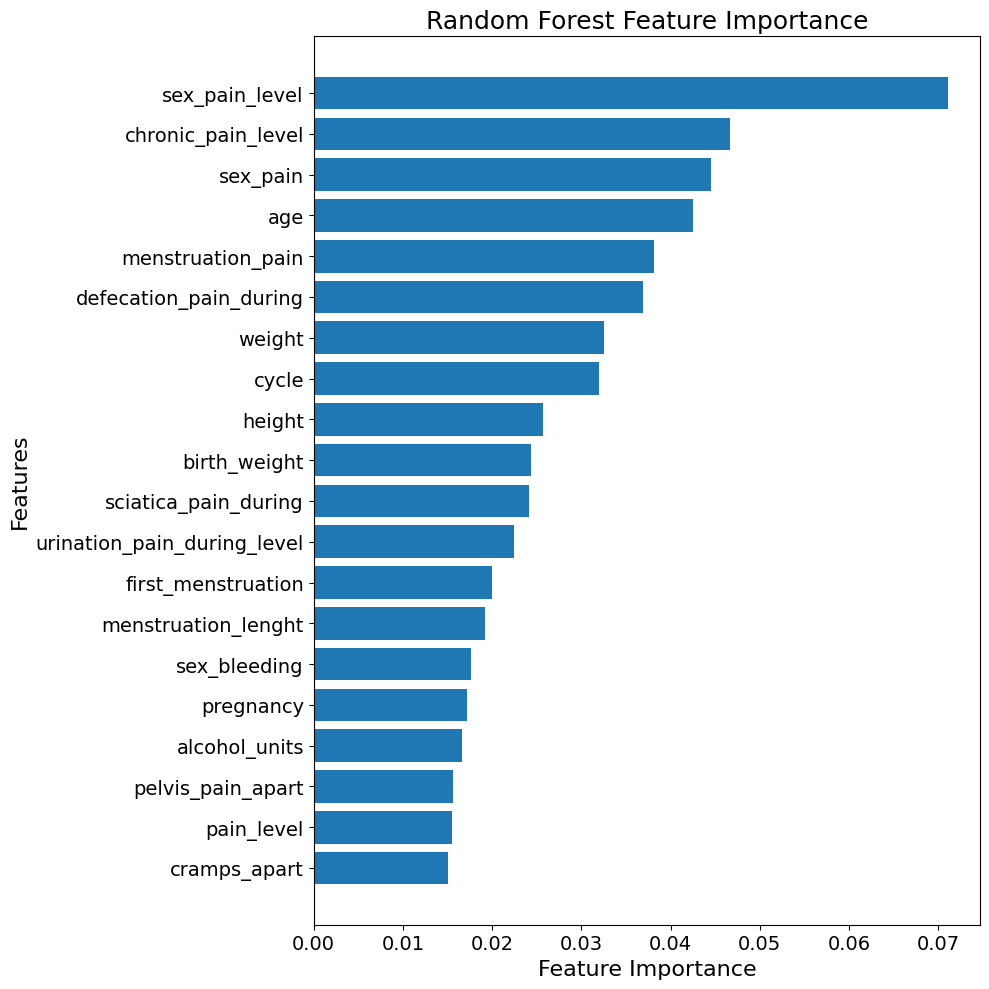

In [36]:
importance = rf.feature_importances_

sorted_idx = np.argsort(importance)
sorted_features = X.columns[sorted_idx]
sorted_importance = importance[sorted_idx]

plt.figure(figsize=(10, 10))
plt.barh(sorted_features[-20:], sorted_importance[-20:])

# Adjusting text sizes
plt.xlabel('Feature Importance', fontsize=16)
plt.ylabel('Features', fontsize=16)  # Optional if you want to label the y-axis
plt.title('Random Forest Feature Importance', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()  # To prevent text overlap
plt.show()


In [37]:
features = list(X_train)
explainer = shap.TreeExplainer(rf, X_train.sample(100))
shapley_values_train_extended = explainer(X_train, check_additivity=False)
shapley_values_train = shapley_values_train_extended.values[:,:,1]
shapley_values_test_extended = explainer(X_test, check_additivity=False)
shapley_values_test = shapley_values_test_extended.values[:,:,1]

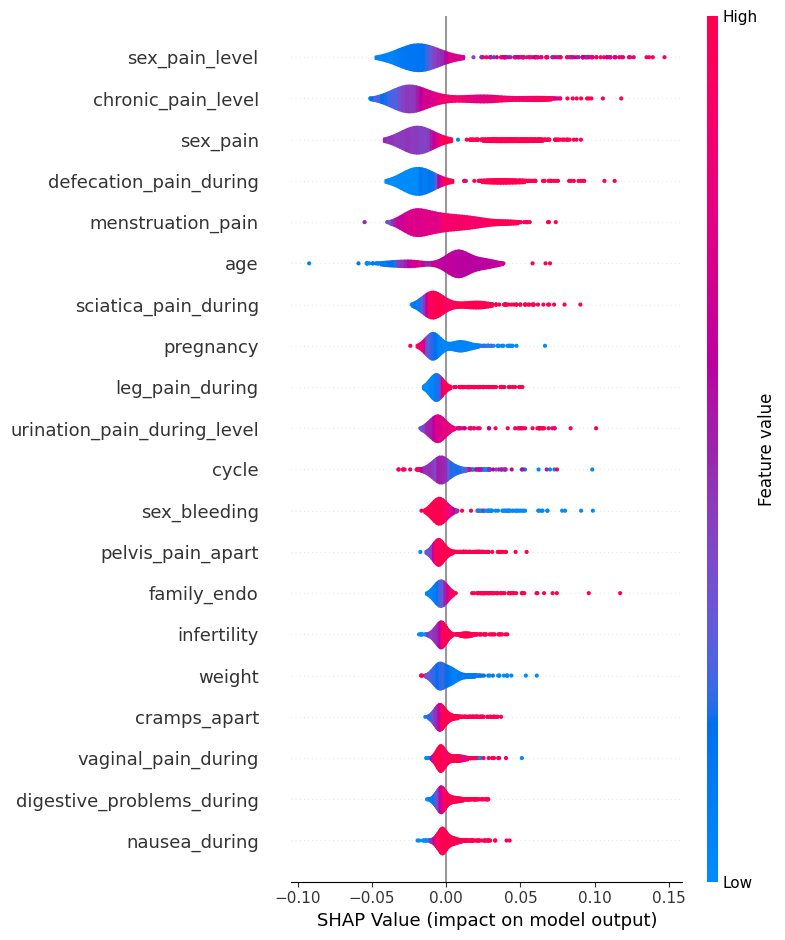

In [38]:
shap.summary_plot(shap_values = shapley_values_train, 
                  features = X_train.values,
                  feature_names = X_train.columns.values,
                  plot_type='violin',
                  max_display=20,
                  show=False)
plt.tight_layout()
plt.xlabel('SHAP Value (impact on model output)')
plt.show()

In [39]:
num_features = X_train.shape[1]
print(f"Number of features used: {num_features}")

Number of features used: 85


In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import os
import itertools
import matplotlib.pyplot as plt

# Ensure the directory for saving PDPs exists
output_dir = "pdp_plots"
os.makedirs(output_dir, exist_ok=True)

# Ensure top_features is a list (in case it's an Index or similar object)
top_features = list(sorted_features[-5:])  # Convert to list to ensure compatibility

# Generate 1-way PDPs for individual features
for feature in top_features:
    # Create a new figure for 1-way PDP
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Generate 1-way PDP
    PartialDependenceDisplay.from_estimator(rf, X_train, features=[feature], ax=ax)
    
    # Set title and axis labels
    ax.set_title(f'1-way Partial Dependence Plot: {feature}', fontsize=14)
    ax.set_xlabel(f'Feature: {feature}', fontsize=12)
    ax.set_ylabel('Average Predicted Outcome', fontsize=12)  # Corrected y-axis label
    
    # Save the figure
    plot_name = f"{feature}_1way_pdp"
    plot_path = os.path.join(output_dir, f'{plot_name}.png')
    plt.tight_layout()
    plt.savefig(plot_path)
    plt.close(fig)  # Close the figure to save memory

    print(f"Saved 1-way PDP plot for {feature} to {plot_path}")

# Generate 2-way PDPs for all distinct feature pairs (excluding (A, A) and keeping combinations of different features)
for feature_pair in itertools.combinations(top_features, 2):  # This generates 5 x 4 = 20 combinations
    # Create a new figure for 2-way PDP
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Generate 2-way PDP
    PartialDependenceDisplay.from_estimator(rf, X_train, features=[feature_pair], ax=ax)
    
    # Set title and axis labels
    feature_name = f"{feature_pair[0]} and {feature_pair[1]}"
    ax.set_title(f'2-way Partial Dependence Plot: how {feature_name} affects average predicted outcome', fontsize=14)
    ax.set_xlabel(f'Feature(s): {feature_name}', fontsize=12)
    ax.set_ylabel('Average Predicted Outcome', fontsize=12)  # Corrected y-axis label
    
    # Save the figure
    plot_name = f"{feature_pair[0]}_{feature_pair[1]}_2way_pdp"
    plot_path = os.path.join(output_dir, f'{plot_name}.png')
    plt.tight_layout()
    plt.savefig(plot_path)
    plt.close(fig)  # Close the figure to save memory

    print(f"Saved 2-way PDP plot for {feature_name} to {plot_path}")

print(f"All PDP plots saved in the '{output_dir}' directory.")


Saved 1-way PDP plot for menstruation_pain to pdp_plots/menstruation_pain_1way_pdp.png
Saved 1-way PDP plot for height to pdp_plots/height_1way_pdp.png
Saved 1-way PDP plot for age to pdp_plots/age_1way_pdp.png
Saved 1-way PDP plot for sex_pain to pdp_plots/sex_pain_1way_pdp.png
Saved 1-way PDP plot for sex_pain_level to pdp_plots/sex_pain_level_1way_pdp.png
Saved 2-way PDP plot for menstruation_pain and height to pdp_plots/menstruation_pain_height_2way_pdp.png
Saved 2-way PDP plot for menstruation_pain and age to pdp_plots/menstruation_pain_age_2way_pdp.png
Saved 2-way PDP plot for menstruation_pain and sex_pain to pdp_plots/menstruation_pain_sex_pain_2way_pdp.png
Saved 2-way PDP plot for menstruation_pain and sex_pain_level to pdp_plots/menstruation_pain_sex_pain_level_2way_pdp.png
Saved 2-way PDP plot for height and age to pdp_plots/height_age_2way_pdp.png
Saved 2-way PDP plot for height and sex_pain to pdp_plots/height_sex_pain_2way_pdp.png
Saved 2-way PDP plot for height and sex_p

In [ ]:
from sklearn.inspection import partial_dependence
import matplotlib.pyplot as plt
import os

# Directory to save plots
output_dir = "ice_plots"
os.makedirs(output_dir, exist_ok=True)

# Iterate through all features
for feature in top_features:
    # Generate ICE data
    pdp_result = partial_dependence(rf, X_train, features=[feature], kind="individual")
    
    # Calculate the average for PDP manually (average of all individual ICE curves)
    ice_data = pdp_result['individual'][0]
    average_ice = ice_data.mean(axis=0)  # Averaging over all individual lines
    
    # Create a new figure for each feature
    plt.figure(figsize=(8, 6))
    
    # Plot individual lines (ICE)
    for individual_line in ice_data:
        plt.plot(pdp_result['grid_values'][0], individual_line, alpha=0.3, color='blue')
    
    # Plot the average line (PDP)
    plt.plot(pdp_result['grid_values'][0], average_ice, color='red', linewidth=2, label='PDP')
    
    plt.title(f"ICE Plot for {feature}")
    plt.xlabel(feature)
    plt.ylabel("Predicted Outcome")
    plt.legend()
    
    # Save the figure
    plot_path = os.path.join(output_dir, f'{feature}_ice.png')
    plt.tight_layout()
    plt.savefig(plot_path)
    plt.close()  # Close the figure to save memory

    print(f"Saved ICE plot for {feature} to {plot_path}")

print(f"All ICE plots saved in the '{output_dir}' directory.")



Saved ICE plot for sex_bleeding to ice_plots\sex_bleeding_ice.png
Saved ICE plot for chronic_pain_level to ice_plots\chronic_pain_level_ice.png
Saved ICE plot for menstruation_pain to ice_plots\menstruation_pain_ice.png
Saved ICE plot for sex_pain to ice_plots\sex_pain_ice.png
Saved ICE plot for sex_pain_level to ice_plots\sex_pain_level_ice.png
All ICE plots saved in the 'ice_plots' directory.
